## Задание 1

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Генерация случайной величины

In [14]:
def generation_RV(N):
    rand_var = []
    for i in range(0,N):
        rand_var.append(random.uniform(0,20))
    rand_var.sort()
    return rand_var

### Функция распределения плотности вероятности для нормального закона

In [15]:
def probability_density(rand_var, M, msd):
    p = []
    for i in range(0, len(rand_var)):
        p.append((1/(msd*((2*np.pi)**0.5)))*np.exp(-((rand_var[i]-M)**2)/2*(msd**2)))
    return p

Text(0, 0.5, 'p(x)')

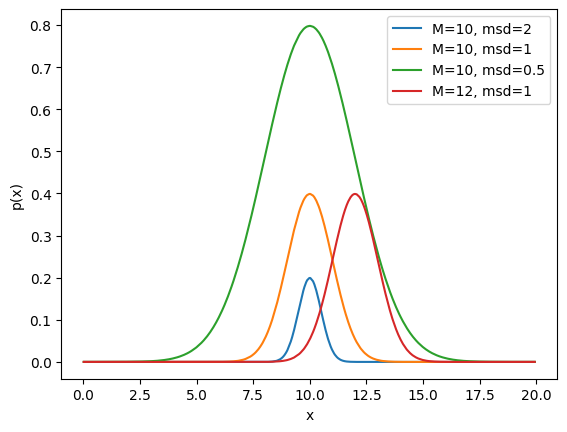

In [16]:
rand_var = generation_RV(500)
p1 = probability_density(rand_var, 10, 2)
p2 = probability_density(rand_var, 10, 1)
p3 = probability_density(rand_var, 10, 0.5)
p4 = probability_density(rand_var, 12, 1)

plt.plot(rand_var, p1, label='M=10, msd=2')
plt.plot(rand_var, p2, label='M=10, msd=1')
plt.plot(rand_var, p3, label='M=10, msd=0.5')
plt.plot(rand_var, p4, label='M=12, msd=1')
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')

## Задание 2

In [17]:
import scipy

### Функция распределения для нормального закона

In [18]:
def distribution_norm(rand_var, M, msd):
    p_distr = []
    for i in range(0,len(rand_var)):
        p_distr.append(scipy.stats.norm.cdf((rand_var[i]-M)/msd))
    return p_distr

Text(0, 0.5, 'F(x)')

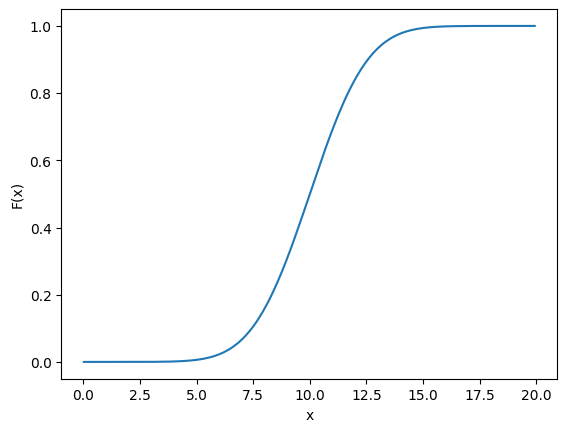

In [19]:
p_distr_task2 = distribution_norm(rand_var, 10, 2)
plt.plot(rand_var, p_distr_task2, label='M=10, msd=2')
plt.xlabel('x')
plt.ylabel('F(x)')

## Задание 3

### Моделирование нормального закона с помощью метода обратной функции

In [20]:
def modeling_norm_revers(M_y, msd_y, n, N):
    M_x = M_y
    msd_x = (n**0.5)*msd_y
    a = M_x - (3**0.5)*msd_x
    b = M_x + (3**0.5)*msd_x
    Y = [0 for i in range(N)]
    for i in range(0, N):
        for j in range(0, n):
            Y[i] = Y[i] + (a + np.random.rand()*(b - a))
        Y[i] = Y[i]/n
    return Y

In [21]:
import math

### Функция, описывающая распределение случайной величины на отрезке от А до В с коэфф. деления К

In [22]:
def rand_var_distr(X, A, B, K):
    dY = (B-A)/K
    F_rand = []
    for i in range(0, K):
        F_rand.append(0)
    for j in range(0, len(X)):
        yC = X[j]
        fN = math.floor(yC/dY)
        F_rand[fN] = F_rand[fN] + 1
    for i in range(0, K):
        F_rand[i] = (F_rand[i]/(len(X)*dY))
    return F_rand

### Интегральная вероятность для полученной частоты

In [23]:
def integral_probability(freq):
    integral_freq = []
    for i in range(0, len(freq)):
        integral_freq.append(sum(freq[0:i])/sum(freq))
    return integral_freq

In [24]:
M = 10
msd = 2
A = 0
B = 20
K = 100
N = [10**2, 10**3, 10**4, 10**5, 10**6]
y = []
freq = []
integral_freq = []

### Моделирование распределений

In [26]:
for n in N:
    y.append(modeling_norm_revers(M, msd, K, n))
    freq.append(rand_var_distr(y[-1], A, B, K))
    integral_freq.append(integral_probability(freq[-1]))

## Задание 4

Text(0.5, 1.0, 'N = 10**6')

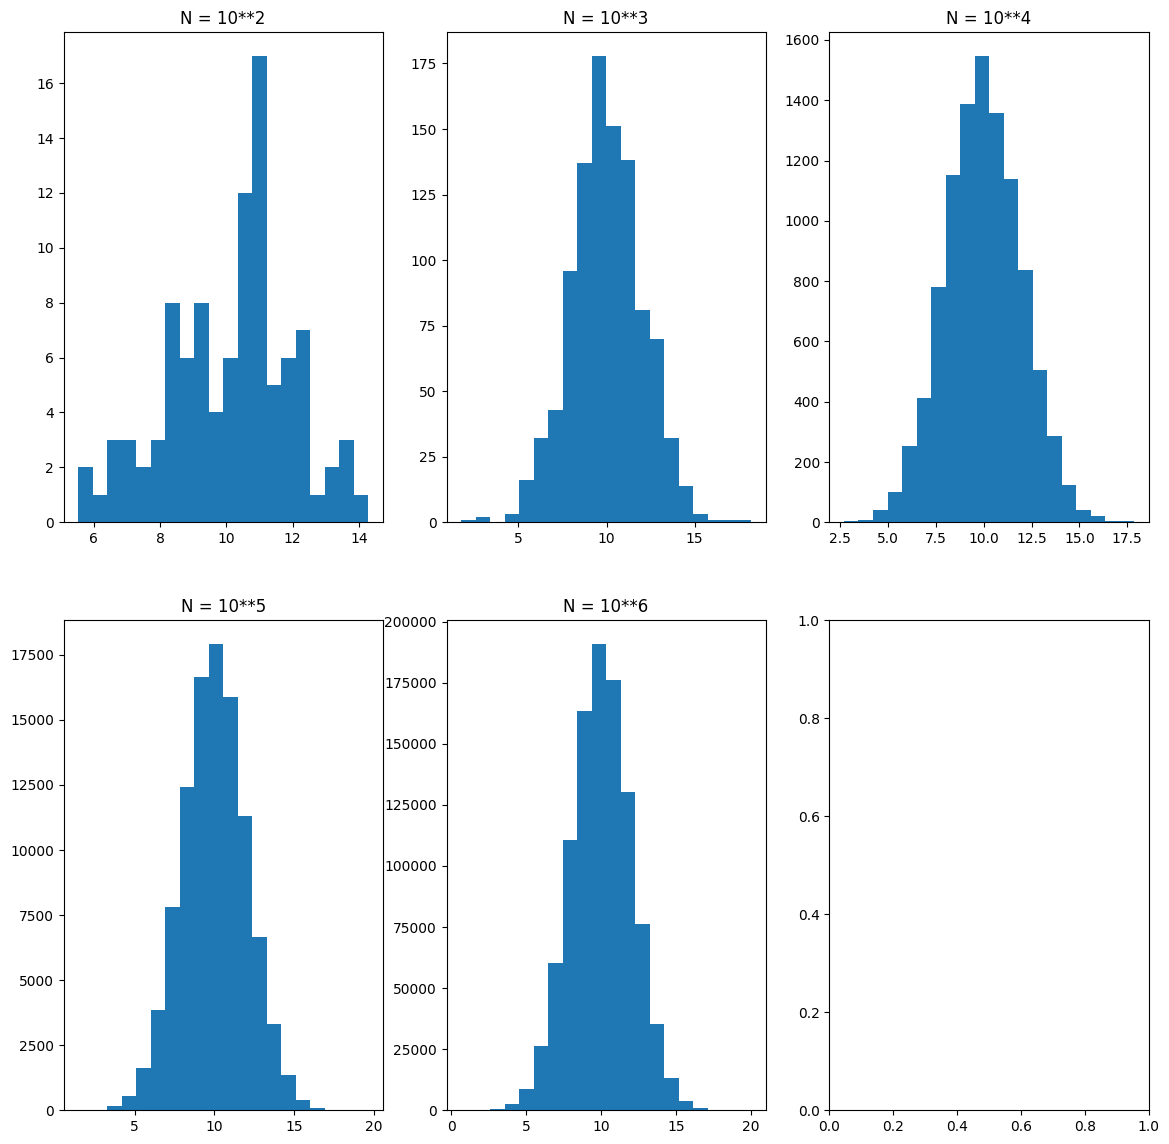

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(14, 14))
axs[0,0].hist(y[0], 20)
axs[0,0].set_title("N = 10**2")
axs[0,1].hist(y[1], 20)
axs[0,1].set_title("N = 10**3")
axs[0,2].hist(y[2], 20)
axs[0,2].set_title("N = 10**4")
axs[1,0].hist(y[3], 20)
axs[1,0].set_title("N = 10**5")
axs[1,1].hist(y[4], 20)
axs[1,1].set_title("N = 10**6")

## Задание 5

In [28]:
M_x = []
msd_x = []
eps_M_x = []
eps_msd_x = []
for i, n in enumerate(N):
    M_x.append(sum(y[i])/n)
    msd_x.append(((sum([x**2 for x in y[i]])/n - M_x[-1]**2)*(n/(n-1)))**0.5)
    eps_M_x.append(abs((M - M_x[-1])/M)*100)
    eps_msd_x.append(abs((msd - msd_x[-1])/msd)*100)
    k = i+2
    print(f'N=10**{k}:\n eps_{k-1} = {eps_msd_x[-1]}\n')

N=10**2:
 eps_1 = 5.4367530825774395

N=10**3:
 eps_2 = 0.9229028959156782

N=10**4:
 eps_3 = 0.7428026338047733

N=10**5:
 eps_4 = 0.19657293709987034

N=10**6:
 eps_5 = 0.021425409751496538



### График зависимости средней квадратичной погрешности от числа экспериментов

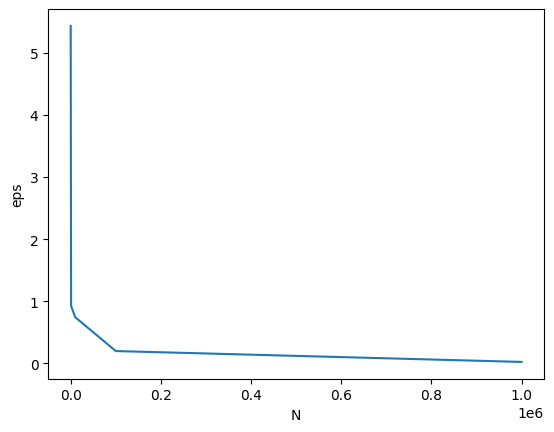

In [29]:
plt.plot(N, eps_msd_x)
plt.xlabel('N')
plt.ylabel('eps')
plt.show()